In [28]:
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import pickle
import skimage as ski

In [17]:
currentPath = os.path.abspath("")
glutamate_roi_finder_Path = os.path.join(os.path.join(os.path.join(currentPath, os.pardir), os.pardir), "glutamate_roi_finder")
dump_Path = os.path.join(glutamate_roi_finder_Path, "imgDiffMax.dump")
if(os.path.exists(dump_Path)):
    with open(dump_Path, 'rb') as intp:
        imgDiffMax = pickle.load(intp)
    print("Dump loaded")
    print(imgDiffMax.shape)
    imgDiffMask = (imgDiffMax >= 12).astype(int)
else:
    print("Path not found")

Dump loaded
(512, 512)


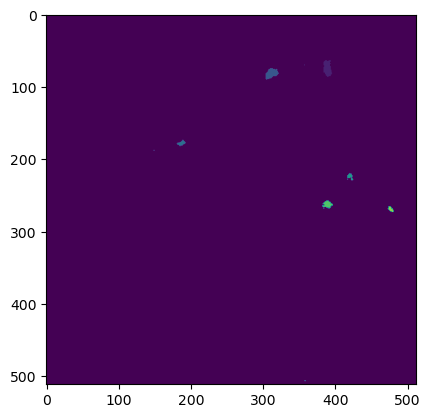

In [20]:
labeledImg = ski.measure.label(imgDiffMask, connectivity=2)
plt.imshow(labeledImg)

In [21]:
print(labeledImg)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
regprops = ski.measure.regionprops(labeledImg)

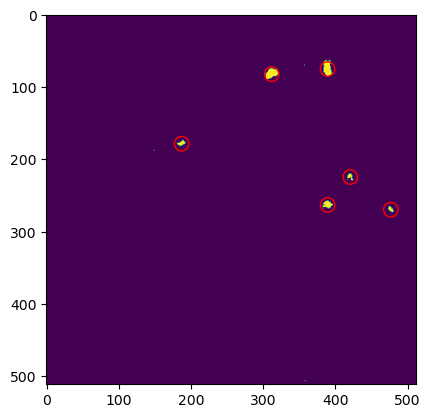

In [42]:
fig, ax = plt.subplots()
for i in range(len(regprops)):
    c = Circle((regprops[i].centroid[1], regprops[i].centroid[0]), 10, color="red", fill=False)
    if (regprops[i].area > 3.1415*10**2*0.1):
        ax.add_patch(c)
ax.imshow(imgDiffMask)
plt.show()